In [ ]:
# Libraries 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [16]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')
# Load the testing dataset
test_data = pd.read_csv('../archive/sign_mnist_test.csv')
print("First five rows of the training dataset")
train_data.head()

First five rows of the training dataset


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [17]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Separate the data (features) and the classes
X_test = test_data.drop(['label'], axis=1)  # Features (all columns except the first one)
X_test = X_test / 255.0
y_test = test_data['label']   # Target (first column)

# Create validation dataset by splitting training data (10% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_validate.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 24709 samples
Validation set size: 2746 samples
Testing set size: 7172 samples


In [ ]:

train_acc_list = []
val_acc_list = []
final_loss_list = []

model = MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        alpha= 0.0001,                 # ← regularization strength
        validation_fraction=0.1, # ← 10% of X_train used internally
        n_iter_no_change=10,     # ← patience for early stopping
        max_iter=200,
        random_state=42
    )
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
val_acc = model.score(X_validate, y_validate)
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
# model.loss_curve_[-1]


Training Accuracy: 100.00%
Validation Accuracy: 100.00%


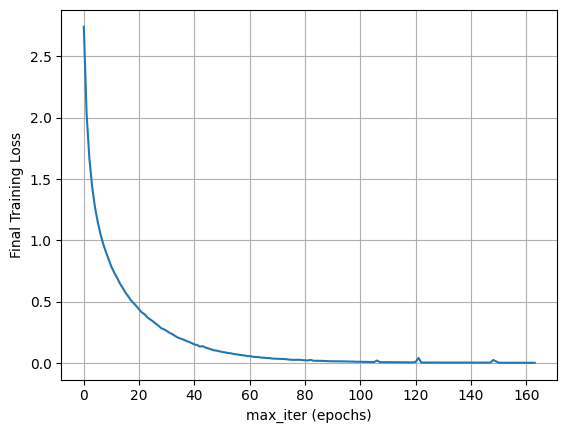

In [20]:
plt.plot( model.loss_curve_)
plt.xlabel("max_iter (epochs)")
plt.ylabel("Final Training Loss")
plt.grid()
plt.show()
